In [1]:
# %load synimagegen.py
from typing import List, Tuple, Optional, Union
import numpy as np
from scipy.special import erf
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from synimagegen import *

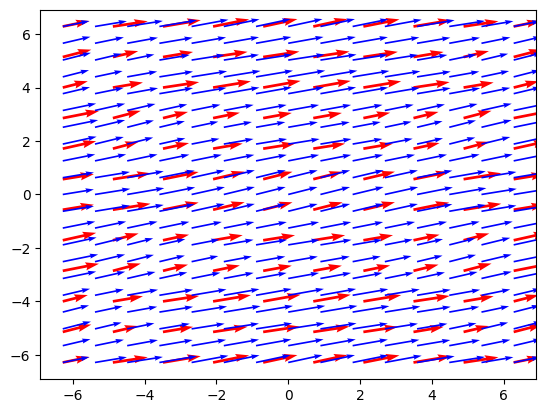

In [3]:
plot_synthetic_field_example()

In [4]:
# invent some region
x,y = np.linspace(0,1,10), np.linspace(1,2,10)
# make it 2D:
x,y = np.meshgrid(x,y)
# create velocity field for those grid points
u,v = synthetic_flow_data(x,y)


# decide the image size
image_size = (256, 256)

In [5]:
x1 , y1, par_diam1, par_int1, x2, y2, par_diam2, par_int2 = \
create_synimage_parameters(
    x,
    y, 
    u, 
    v, 
    image_size = image_size,
    particle_density = 0.01,
    per_loss_pairs = 5,
    par_diam_mean = 3.87,
    par_diam_std = 1.5,
    par_int_std = 0.35,
    dt = 0.01,
    )

In [6]:
a,b = generate_particle_images_pair(image_size, 
                                    x1 , y1, par_diam1, par_int1, 
                                    x2, y2, par_diam2, par_int2)

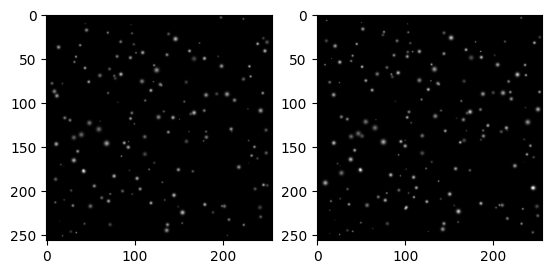

In [7]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(a, cmap='gray')
ax[1].imshow(b, cmap='gray')

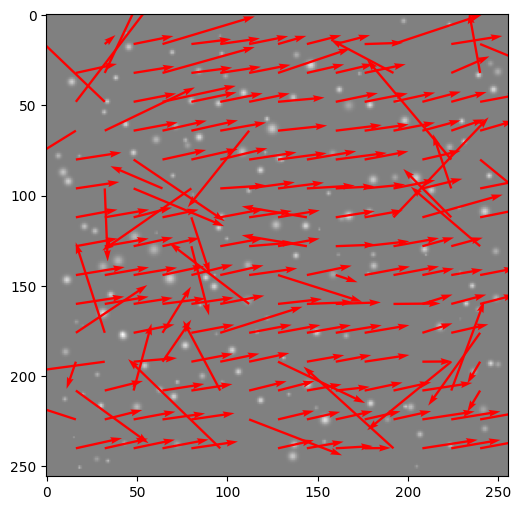

In [8]:
from openpiv import piv 
xo,yo,uo,vo,so = piv.simple_piv(a, b)

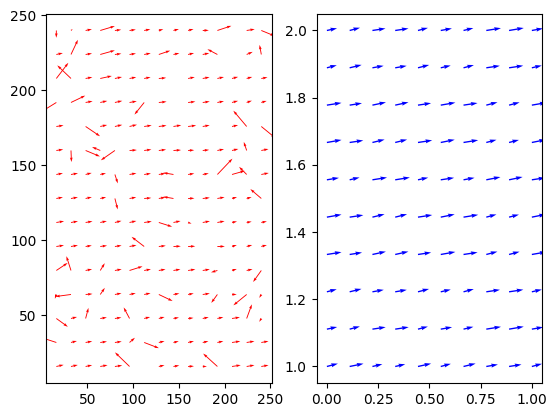

In [9]:
fig,ax = plt.subplots(1,2)
ax[0].quiver(xo,yo,uo,vo,color='r')
ax[1].quiver(x,y,u,v,color='b')


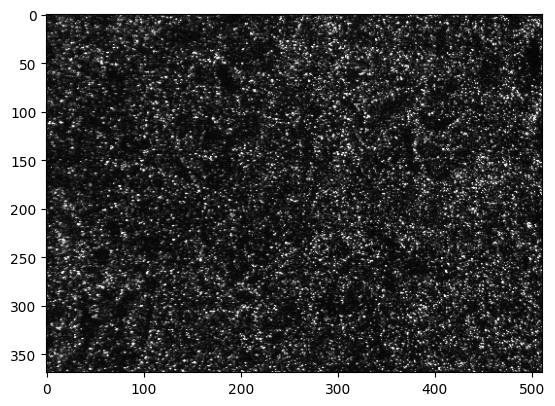

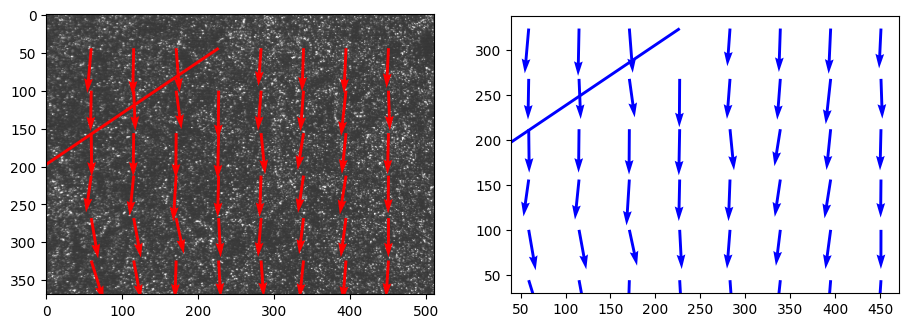

In [10]:
x,y,u,v = piv.piv_example()

/home/user/mambaforge/envs/openpiv/lib/python3.11/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=9,4 m=48 fp=613.933724 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/home/user/mambaforge/envs/openpiv/lib/python3.11/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


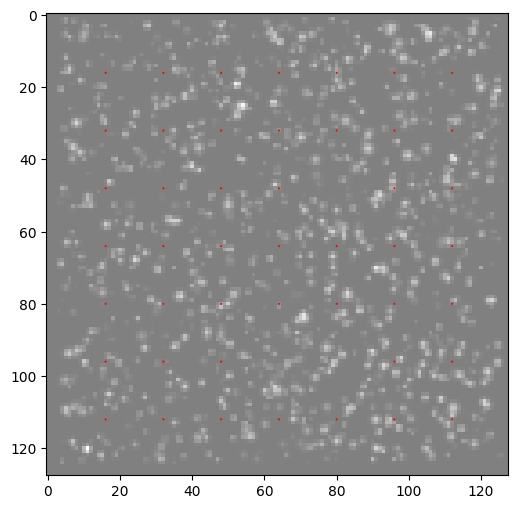

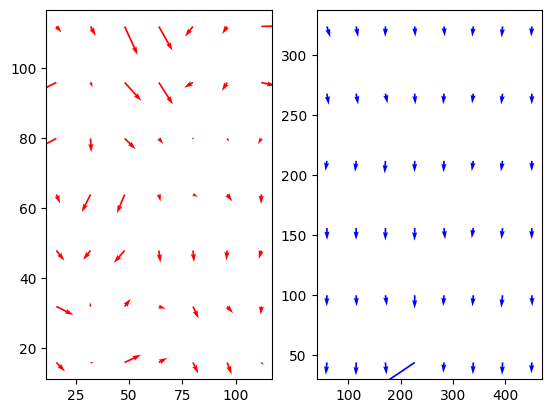

In [11]:
image_size = (128, 128)
x1 , y1, par_diam1, par_int1, x2, y2, par_diam2, par_int2 = \
create_synimage_parameters(
    x,
    y, 
    u, 
    -v, 
    image_size = image_size,
    particle_density = 0.25,
    per_loss_pairs = 5,
    par_diam_mean = 1.57,
    par_diam_std = 0.8,
    par_int_std = 0.25,
    dt = 0.01,
    )

a,b = generate_particle_images_pair(image_size, 
                                    x1 , y1, par_diam1, par_int1, 
                                    x2, y2, par_diam2, par_int2)

xo,yo,uo,vo,so = piv.simple_piv(a, b)

fig,ax = plt.subplots(1,2)
ax[0].quiver(xo,yo,uo,vo,color='r')
ax[1].quiver(x,y,u,-v,color='b')